In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# For matrix factorization
from scipy.sparse.linalg import svds

# **Item-Recommendations**

In [ ]:
#Reading users file:
users= pd.read_csv('/content/ratings.csv')
# Checking shape of users files and head
print(users.shape)
users.head()


(100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
# Reading the movie data
movies= pd.read_csv('/content/movies.csv')
# Checking shape of movie data and look first 5 rows
print(movies.shape)
movies.head()


(9742, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
# Combining the data on same column
df= pd.merge(users, movies, on= 'movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


Movies Rating average

In [ ]:
# Rating average
df.groupby('title').agg({'rating':'mean'}).sort_values(by='rating', ascending=False).head()

,rating
title,
Gena the Crocodile (1969),5.0
True Stories (1986),5.0
Cosmic Scrat-tastrophe (2015),5.0
Love and Pigeons (1985),5.0
Red Sorghum (Hong gao liang) (1987),5.0


Count for the already rated movies

In [ ]:
# count of each rating given for movies
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [ ]:
# Removing the single quotes from the title column
df['title'] = df['title'].str.replace("'", "")

# Printing the modified DataFrame
df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


movies rating and count of times it was rated

In [ ]:
# Averge rating
ratings= pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()
# Rating counts
ratings['rating_counts']= pd.DataFrame(df.groupby('title')['rating'].count())
ratings=ratings.reset_index()
ratings

,title,rating,rating_counts
0,(500) Days of Summer (2009),3.666667,42
1,*batteries not included (1987),3.285714,7
2,...All the Marbles (1981),2.000000,1
3,...And Justice for All (1979),3.166667,3
4,00 Schneider - Jagd auf Nihil Baxter (1994),4.500000,1
...,...,...,...
9714,night Mother (1986),3.000000,1
9715,xXx (2002),2.770833,24
9716,xXx: State of the Union (2005),2.000000,5
9717,¡Three Amigos! (1986),3.134615,26


visualize the rating of the movies given by users:


1.   To know if it's normally distributed
2.   To know the rates most of the user give



Text(0, 0.5, 'count of rating')

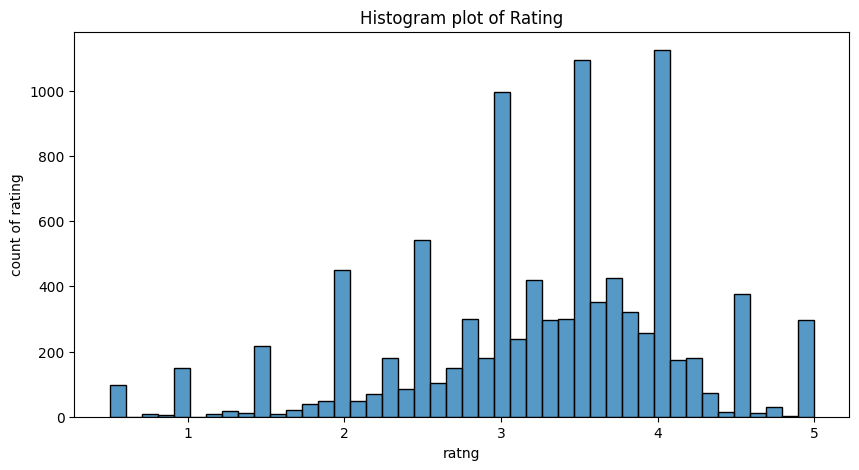

In [ ]:
# Lets look at the rating
plt.figure(figsize=(10,5))
sns.histplot(ratings['rating'])
plt.title("Histogram plot of Rating")
plt.xlabel('ratng')
plt.ylabel('count of rating')

visualize the rating vs counts

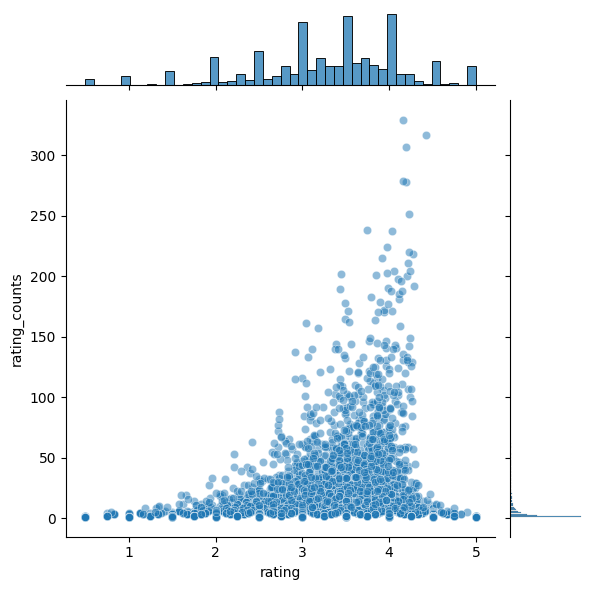

In [ ]:
sns.jointplot(x='rating',y='rating_counts',data=ratings,alpha=0.5)

**Movies Recommendation**

1- Utility Matrix

In [ ]:
# Lets create a pivot table
movies_df= df.pivot_table(index="title",columns='userId',values='rating').fillna(0)
movies_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
*batteries not included (1987),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...All the Marbles (1981),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...And Justice for All (1979),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00 Schneider - Jagd auf Nihil Baxter (1994),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


2- Sparse row matrix to foucus on non zero values

In [ ]:
from scipy.sparse import csr_matrix

# Now converting into metrix
movies_df_metrix= csr_matrix(movies_df.values)

3- KNN model for recommendations with cosine similarity

In [ ]:
# Here we are going to cosine simalirity
from sklearn.neighbors import NearestNeighbors

# Building the model
model_knn= NearestNeighbors(metric= 'cosine', algorithm='brute')

# Fitting the model
model_knn.fit(movies_df_metrix)

NearestNeighbors(algorithm='brute', metric='cosine')

4- selecting random movies and make the recommenations for it

In [ ]:
# Shape[0]---> selecting from rows
select_random_movies= np.random.choice(movies_df.shape[0])
select_random_movies
# Now we will try to find the movies related to select_random_movies
distances, indices = model_knn.kneighbors(movies_df.iloc[select_random_movies,:].values.reshape(1,-1), n_neighbors= 6)

In [ ]:
#Here 0---> recomendation for same movies

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movies_df.index[select_random_movies])) # For which movies it selected
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movies_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Hot Shots! (1991):

1: Jonah Hex (2010), with distance of 0.4352266442243544:
2: Top Secret! (1984), with distance of 0.44901758029362915:
3: Raw Deal (1986), with distance of 0.462391815615264:
4: Muppets, The (2011), with distance of 0.46551885601077525:
5: Uncle Buck (1989), with distance of 0.4684422023312703:


5- selecting a specific movie

In [ ]:
# Select a specific movie by its index in the movies_df DataFrame
selected_movie_index = 10

# Find the movies related to the selected movie
distances, indices = model_knn.kneighbors(movies_df.iloc[selected_movie_index, :].values.reshape(1, -1), n_neighbors=6)

# Create a DataFrame with the titles of the top similar movies
similar_movies = pd.DataFrame({'Recommended Movies': movies_df.index[indices.flatten()[1:]]})

# Print the DataFrame
similar_movies

,Recommended Movies
0,Bring It On (2000)
1,Shes All That (1999)
2,"Wedding Singer, The (1998)"
3,Never Been Kissed (1999)
4,Easy A (2010)


6- visualize the recommended movies with its Ratings

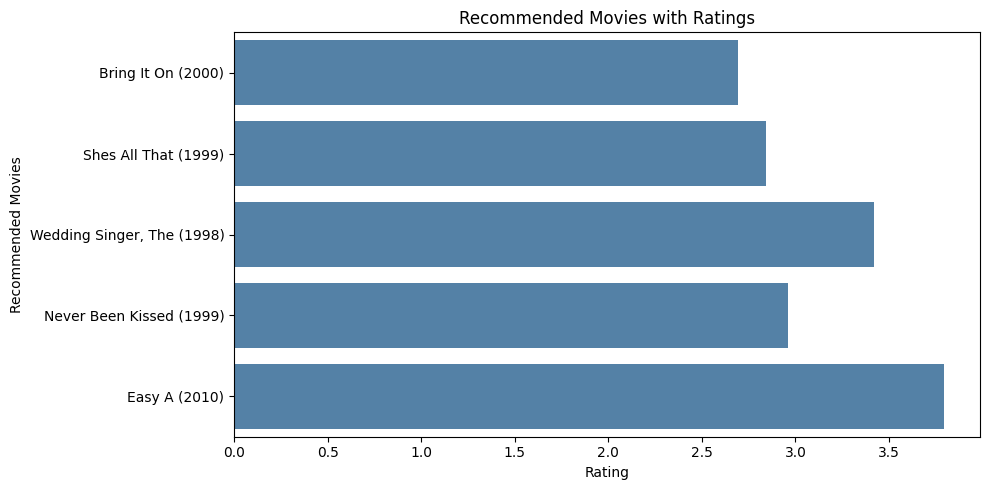

In [ ]:
# Create a DataFrame with the titles and ratings of the top similar movies
similar_movies = pd.DataFrame({
    'Recommended Movies': movies_df.index[indices.flatten()[1:]],
    'Rating': ratings.loc[ratings.index[indices.flatten()[1:]], 'rating'].values
})

# Plotting the similar movies with ratings
plt.figure(figsize=(10, 5))
sns.barplot(x='Rating', y='Recommended Movies', data=similar_movies, color='steelblue')
plt.xlabel('Rating')
plt.ylabel('Recommended Movies')
plt.title('Recommended Movies with Ratings')
plt.tight_layout()
plt.show()


(previous -next)In the UI interface

In [ ]:
"""
movies_per_page = 10

# Define the function to get recommendations for a specific page
def get_recommendations_for_page(page_number):
    start_index = (page_number - 1) * movies_per_page
    end_index = start_index + movies_per_page

    # Find the movies related to the selected movie
    distances, indices = model_knn.kneighbors(movies_df.iloc[selected_movie_index, :].values.reshape(1, -1), n_neighbors=end_index)

    # Create a DataFrame with the titles of the similar movies for the current page
    similar_movies = pd.DataFrame({'Recommended movies': movies_df.index[indices.flatten()[start_index:end_index]]}

    return similar_movies

# Example usage
selected_movie_index = 9
current_page = 3

recommendations = get_recommendations_for_page(current_page)
print(recommendations)
"""

"\nmovies_per_page = 10  \n\n# Define the function to get recommendations for a specific page\ndef get_recommendations_for_page(page_number):\n    start_index = (page_number - 1) * movies_per_page\n    end_index = start_index + movies_per_page\n\n    # Find the movies related to the selected movie\n    distances, indices = model_knn.kneighbors(movies_df.iloc[selected_movie_index, :].values.reshape(1, -1), n_neighbors=end_index)\n\n    # Create a DataFrame with the titles of the similar movies for the current page\n    similar_movies = pd.DataFrame({'Recommended movies': movies_df.index[indices.flatten()[start_index:end_index]]}\n\n    return similar_movies\n\n# Example usage\nselected_movie_index = 9  \ncurrent_page = 3  \n\nrecommendations = get_recommendations_for_page(current_page)\nprint(recommendations)\n"

# **User Recommendations**

Top 10 most rated movies

In [ ]:
# Top 10 most rated movies in our dataset
ratings.sort_values('rating_counts', ascending=False).head(10)


,title,rating,rating_counts
3151,Forrest Gump (1994),4.164134,329
7589,"Shawshank Redemption, The (1994)",4.429022,317
6859,Pulp Fiction (1994),4.197068,307
7676,"Silence of the Lambs, The (1991)",4.161290,279
5506,"Matrix, The (1999)",4.192446,278
7997,Star Wars: Episode IV - A New Hope (1977),4.231076,251
4656,Jurassic Park (1993),3.750000,238
1330,Braveheart (1995),4.031646,237
8359,Terminator 2: Judgment Day (1991),3.970982,224
7417,Schindlers List (1993),4.225000,220


**Matrix vectorization**

1-Utility Matrix




In [ ]:
# Pivot to summarise and count
mtrx_df = users.pivot(index = 'userId', columns ='movieId', values = 'rating').fillna(0)
mtrx_df.head()


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Normalize the matrix

In [ ]:

mtrx = mtrx_df.to_numpy()
ratings_mean = np.mean(mtrx, axis = 1)
normalized_mtrx = mtrx - ratings_mean.reshape(-1, 1)
normalized_mtrx

array([[ 3.89582476, -0.10417524,  3.89582476, ..., -0.10417524,
        -0.10417524, -0.10417524],
       [-0.01177499, -0.01177499, -0.01177499, ..., -0.01177499,
        -0.01177499, -0.01177499],
       [-0.00976964, -0.00976964, -0.00976964, ..., -0.00976964,
        -0.00976964, -0.00976964],
       ...,
       [ 2.23215755,  1.73215755,  1.73215755, ..., -0.26784245,
        -0.26784245, -0.26784245],
       [ 2.98755656, -0.01244344, -0.01244344, ..., -0.01244344,
        -0.01244344, -0.01244344],
       [ 4.50611888, -0.49388112, -0.49388112, ..., -0.49388112,
        -0.49388112, -0.49388112]])

2- Using Singular Value Decomposition

In [ ]:
U, sigma, Vt = svds(normalized_mtrx, k = 50)

In [ ]:
# Convert to diagonal form
sigma = np.diag(sigma)

3- Make rating predictions for any user

In [ ]:
all_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + ratings_mean.reshape(-1, 1)

In [ ]:
preds_df = pd.DataFrame(all_predicted_ratings, columns = mtrx_df.columns)
preds_df.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
0,2.167328,0.402751,0.840184,-0.076281,-0.551337,2.504091,-0.890114,-0.026443,0.196974,1.593259,...,-0.023453,-0.019967,-0.026939,-0.026939,-0.023453,-0.026939,-0.023453,-0.023453,-0.023453,-0.058732
1,0.211459,0.006658,0.033455,0.017419,0.183430,-0.062473,0.083037,0.024158,0.049330,-0.152530,...,0.019498,0.016777,0.022219,0.022219,0.019498,0.022219,0.019498,0.019498,0.019498,0.032281
2,0.003588,0.030518,0.046393,0.008176,-0.006247,0.107328,-0.012416,0.003779,0.007297,-0.059362,...,0.005909,0.006209,0.005610,0.005610,0.005909,0.005610,0.005909,0.005909,0.005909,0.008004
3,2.051549,-0.387104,-0.252199,0.087562,0.130465,0.270210,0.477835,0.040313,0.025858,-0.017365,...,0.004836,0.004172,0.005500,0.005500,0.004836,0.005500,0.004836,0.004836,0.004836,-0.023311
4,1.344738,0.778511,0.065749,0.111744,0.273144,0.584426,0.254930,0.128788,-0.085541,1.023455,...,-0.008042,-0.007419,-0.008664,-0.008664,-0.008042,-0.008664,-0.008042,-0.008042,-0.008042,-0.010127


**Recommendations**

In [ ]:
def recommend_movies(preds_df, userId, movie, ratings_df, num_recommendations=5):

    # Get user id, keep in mind index starts from zero
    user_row_number = userId-1
    # Sort user's predictons
    sorted_user_predictions = preds_df.iloc[user_row_number].sort_values(ascending=False)
    # List movies user already rated
    user_data = ratings_df[ratings_df.userId == (userId)]
    user_rated = (user_data.merge(movie, how = 'left', left_on = 'movieId', right_on = 'movieId').
                  sort_values(['rating'], ascending=False)
                 )

    # f'User {userId} has already rated {user_rated.shape[0]} films.'

    recommendations = (movie[~movie['movieId'].isin(user_rated['movieId'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'movieId',
               right_on = 'movieId').
               rename(columns = {user_row_number: 'Predictions'}).
               sort_values('Predictions', ascending = False).
               iloc[:num_recommendations, :-1]
                      )

    return user_rated, recommendations


Already rated movies

In [ ]:
already_rated, predictions = recommend_movies(preds_df, 100, movies, users,10)
# List of already-rated movies
already_rated.head(10)

,userId,movieId,rating,timestamp,title,genres
86,100,1958,5.0,1100186258,Terms of Endearment (1983),Comedy|Drama
101,100,2423,5.0,1100186118,Christmas Vacation (National Lampoon's Christm...,Comedy
137,100,5620,5.0,1100186982,Sweet Home Alabama (2002),Comedy|Romance
55,100,1101,5.0,1100184137,Top Gun (1986),Action|Romance
125,100,4041,5.0,1100184235,"Officer and a Gentleman, An (1982)",Drama|Romance
70,100,1307,4.5,1100183745,When Harry Met Sally... (1989),Comedy|Romance
84,100,1912,4.5,1100186251,Out of Sight (1998),Comedy|Crime|Drama|Romance|Thriller
82,100,1777,4.5,1100184536,"Wedding Singer, The (1998)",Comedy|Romance
81,100,1680,4.5,1100184264,Sliding Doors (1998),Drama|Romance
80,100,1678,4.5,1100186254,"Joy Luck Club, The (1993)",Drama|Romance


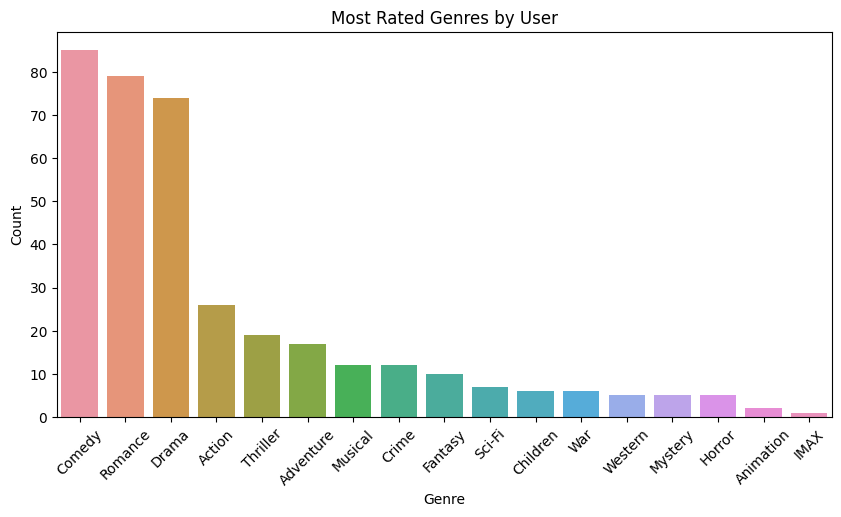

In [ ]:
# Extract the genres column
genres_column = already_rated['genres']

# Split the genres into individual genre labels
genre_labels = []
for genres in genres_column:
    genre_labels.extend(genres.split('|'))

# Count the occurrences of each genre
genre_counts = pd.Series(genre_labels).value_counts()

# Plot the most rated genres
plt.figure(figsize=(10, 5))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Most Rated Genres by User')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Recommendations for specific user

In [ ]:
#default number of Recommendations if not specified is 5
predictions


,movieId,title,genres
1202,1704,Good Will Hunting (1997),Drama|Romance
895,1259,Stand by Me (1986),Adventure|Drama
409,500,Mrs. Doubtfire (1993),Comedy|Drama
358,440,Dave (1993),Comedy|Romance
1185,1682,"Truman Show, The (1998)",Comedy|Drama|Sci-Fi
29,39,Clueless (1995),Comedy|Romance
1991,2797,Big (1988),Comedy|Drama|Fantasy|Romance
112,150,Apollo 13 (1995),Adventure|Drama|IMAX
2082,2918,Ferris Bueller's Day Off (1986),Comedy
1209,1721,Titanic (1997),Drama|Romance


for the next-previous

In [ ]:
"""
def recommend_movies(preds_df, userId, movie, ratings_df, num_recommendations=5, page_num=1, items_per_page=5):
    # Get user id, keep in mind index starts from zero
    user_row_number = userId - 1
    # Sort user's predictions
    sorted_user_predictions = preds_df.iloc[user_row_number].sort_values(ascending=False)
    # List movies user already rated
    user_data = ratings_df[ratings_df.userId == (userId)]
    user_rated = (user_data.merge(movie, how='left', left_on='movieId', right_on='movieId')
                  .sort_values(['rating'], ascending=False)
                 )

    # Calculate start and end indices based on page number and items per page
    start_index = (page_num - 1) * items_per_page
    end_index = start_index + items_per_page

    # Slice the recommendations based on the calculated indices
    recommendations = (movie[~movie['movieId'].isin(user_rated['movieId'])]
                       .merge(pd.DataFrame(sorted_user_predictions).reset_index(), how='left', left_on='movieId', right_on='movieId')
                       .rename(columns={user_row_number: 'Predictions'})
                       .sort_values('Predictions', ascending=False)
                       .iloc[start_index:end_index, :-1]
                      )

    return user_rated, recommendations
"""